In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
#read the dataset and check the first five rows
inp0 =pd.read_csv("C:/Users/TIRTHAN/Desktop/EDA/Data.csv")

# Step 1: Understnding the dataset


In [3]:
# checking first five rows of the dataset
inp0.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
# check the shape of the dataframe
inp0.shape

(10, 4)

In [5]:
# summary of the dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
# statistical summary
inp0.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### Observations:

- Total No. Rows are 10 & Columns are 4.

# Step 2 : Data Handling Cleaning

#### Checking Missing Values

In [7]:
# To check the count of missing values in each column
inp0.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [8]:
# To check the percentage of missing values in each column
(inp0.isnull().sum() / len(inp0))*100

Country       0.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64

In [9]:
# check the number of null values in the columns
inp0.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

## Handling missing values 

# 1)Age

In [10]:
inp0[~inp0.Age.isnull()]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# 2)Salary

In [11]:
inp0[~inp0.Salary.isnull()]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Missing Value Treatment :

## Age

In [12]:
#Drop the rows having null values in Age
inp1 = inp0[~inp0.Age.isnull()]

# Check the shape of the dataframe
inp1.shape

(9, 4)

In [13]:
inp1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
#Check the number of nulls in the Age and again to cross-verify
inp1.Age.isnull().sum()

0

In [15]:
# check the number of null values again in the columns
inp1.isnull().sum()

Country      0
Age          0
Salary       1
Purchased    0
dtype: int64

## Salary

In [16]:
#Check the nulls again in Salary column to verify

inp1[~inp1['Salary'].isnull()]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [17]:
#Check the most common value in the Salary column
inp1['Salary'].value_counts()

61000.0    1
48000.0    1
83000.0    1
79000.0    1
67000.0    1
58000.0    1
54000.0    1
72000.0    1
Name: Salary, dtype: int64

In [18]:
#Fill up the nulls in the column with the above value
inp1['Salary'] = inp1['Salary'].fillna(inp1['Salary'].mean())

<ipython-input-18-75978d29a0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Salary'] = inp1['Salary'].fillna(inp1['Salary'].mean())


In [19]:
#Check the nulls in the column again to cross-verify
inp1['Salary'].isnull().sum()

0

In [20]:
# check the number of null values again in the columns
inp1.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

# Sanity Checks

### Round off the Age and Salary Columns

In [21]:
#For Age
inp1['Age']=inp1['Age'].apply(lambda x:round(x))
inp1

<ipython-input-21-442c6521305f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Age']=inp1['Age'].apply(lambda x:round(x))


,Country,Age,Salary,Purchased
0,France,44,72000.0,No
1,Spain,27,48000.0,Yes
2,Germany,30,54000.0,No
3,Spain,38,61000.0,No
4,Germany,40,65250.0,Yes
5,France,35,58000.0,Yes
7,France,48,79000.0,Yes
8,Germany,50,83000.0,No
9,France,37,67000.0,Yes


In [22]:
#For Salary
inp1['Salary']=inp1['Salary'].apply(lambda x:round(x))
inp1

<ipython-input-22-e42611dab364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Salary']=inp1['Salary'].apply(lambda x:round(x))


,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,65250,Yes
5,France,35,58000,Yes
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [23]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

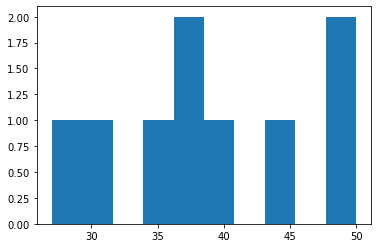

In [24]:
#Create a histogram of the Age
plt.hist(inp1.Age)
plt.show()

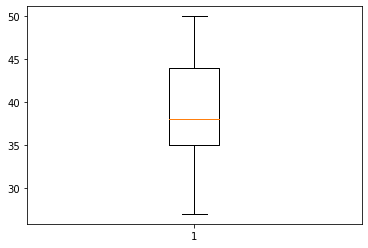

In [25]:
#Create a box plot for the Age column
plt.boxplot(inp1.Age)
plt.show()

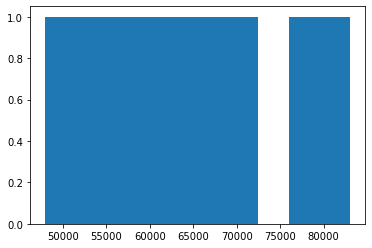

In [26]:
#Create a histogram of the Salary
plt.hist(inp1.Salary)
plt.show()

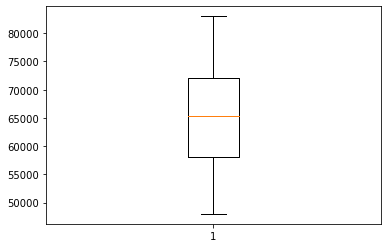

In [27]:
#Create a box plot for the Salary column
plt.boxplot(inp1.Salary)
plt.show()

## Bivariate Analysis

C:\Users\TIRTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


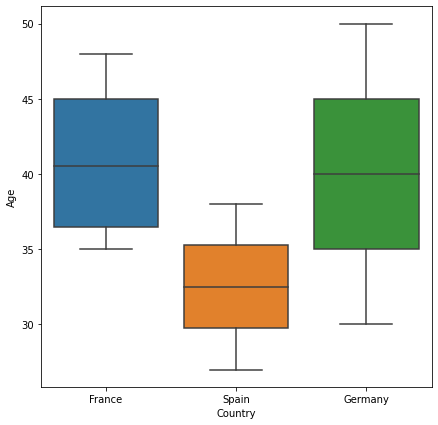

In [28]:
#Plot For Category Vs Numeric C->N
#Plot a side by side box Plot : Boxplot of Age Vs Salary
plt.figure(figsize=[7,7])
sns.boxplot(inp1['Country'],inp1['Age'])
plt.show()

## Bar Plot

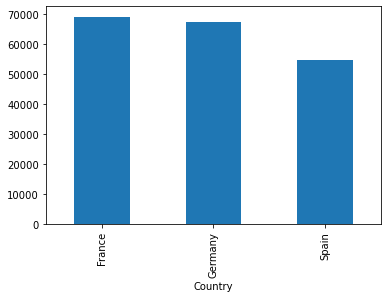

In [29]:
#Plot For Category Vs Numeric C->N
inp1.groupby(['Country'])['Salary'].mean().plot.bar()
plt.show()

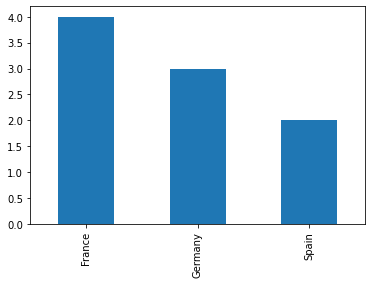

In [30]:
#Plot the Country column in Bar Plot
inp1['Country'].value_counts().plot.bar()
plt.show()

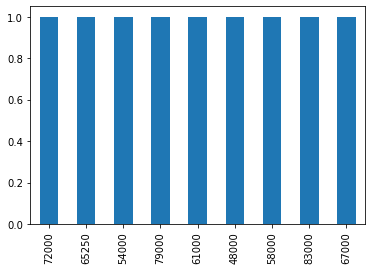

In [31]:
#plot the Salary column in Bar Plot
inp1['Salary'].value_counts().plot.bar()
plt.show()

# Scatter Plot

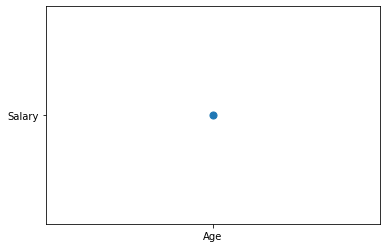

In [32]:
#Plot For Category Vs Numeric C->N
#Plot the Scatter Plot of Salary & Age
plt.scatter('Age','Salary', alpha = 1, s=50)

# Line Plot

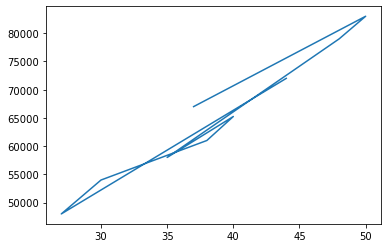

In [33]:
#plot the Age & Salary columns in Line Plot
plt.plot(inp1.Age ,inp1.Salary)
plt.show()

## Multi-Variate Analysis

C:\Users\TIRTHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


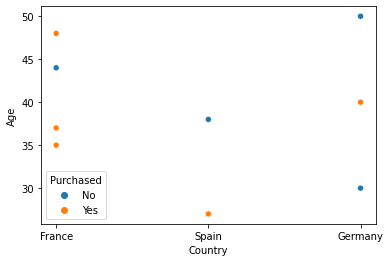

In [34]:
#Plot the Sctterplot in Age & Country
sns.scatterplot(inp1.Country, inp1.Age, hue=inp1['Purchased'])
plt.show()

# Heat Map

In [35]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1,index="Salary",columns="Country",values="Age",aggfunc=lambda x: np.quantile(x,0.2))

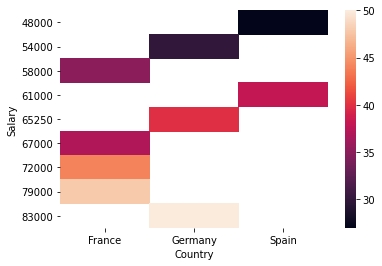

In [36]:
##Plot a heat map
sns.heatmap(res)
plt.show()

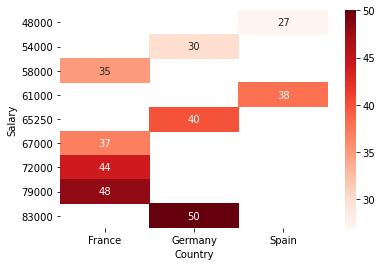

In [37]:
##Apply customisations
sns.heatmap(res, cmap = "Reds", annot=True)
plt.show()